# Análise exploratória do dataset de preços de aluguel no Brasil

Dados de domínio público, obtidos e disponíveis (29/05/2020) no Kaggle em: https://www.kaggle.com/rubenssjr/brasilian-houses-to-rent?select=houses_to_rent_v2.csv

In [1]:
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv('./houses_to_rent_v2.csv')

In [3]:
df.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836


In [4]:
[city for city in df.city.unique()]

['São Paulo', 'Porto Alegre', 'Rio de Janeiro', 'Campinas', 'Belo Horizonte']

In [5]:
df.shape

(10692, 13)

In [6]:
df['city'].value_counts()

São Paulo         5887
Rio de Janeiro    1501
Belo Horizonte    1258
Porto Alegre      1193
Campinas           853
Name: city, dtype: int64

## Focando a análise

Tenho maior interesse nas cidades: Campinas e São Paulo.
Campinas possui apenas 853 observações de imóveis, enquanto São Paulo possui 5887 observações. Me parece pertinente mantê-las em sets separados.

### Campinas

In [7]:
df_cps = df.query("city == 'Campinas'")

In [8]:
df_cps.shape

(853, 13)

In [9]:
[column for column in df_cps.columns]

['city',
 'area',
 'rooms',
 'bathroom',
 'parking spaces',
 'floor',
 'animal',
 'furniture',
 'hoa (R$)',
 'rent amount (R$)',
 'property tax (R$)',
 'fire insurance (R$)',
 'total (R$)']

O meu maior interesse é estudar o preço, então vamos visualizá-lo.

In [10]:
df_cps.sample(1)

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
9788,Campinas,188,2,3,8,-,acept,not furnished,0,2930,584,45,3559


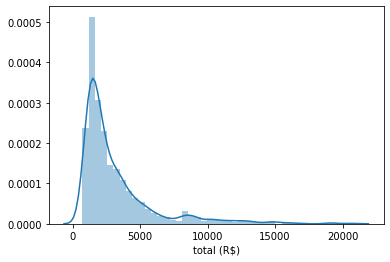

In [11]:
sns.distplot(df_cps['total (R$)'])

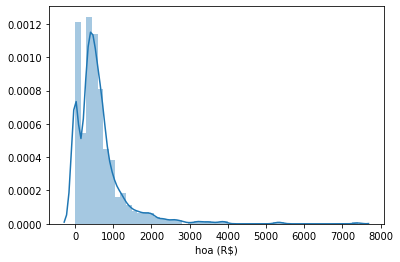

In [12]:
sns.distplot(df_cps['hoa (R$)'])

In [13]:
df[['hoa (R$)', 'rent amount (R$)']].corr()

,hoa (R$),rent amount (R$)
hoa (R$),1.00000,0.03649
rent amount (R$),0.03649,1.00000


A correlação entre `hoa (R$)` e `rent amount (R$)` é bem baixa, porém o valor está imbutido no `total (R$)`. Considerando que para o consumidor final o valor total é o que importa afinal, estudarei apenas este.

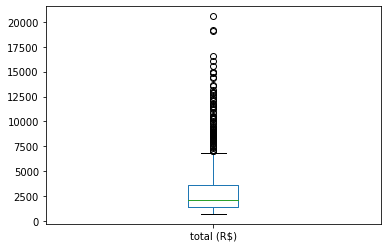

In [14]:
df_cps_total = df_cps['total (R$)']
df_cps_total.plot(kind='box')

In [15]:
df_cps_total.describe()

count      853.000000
mean      3173.276671
std       2857.281849
min        711.000000
25%       1417.000000
50%       2140.000000
75%       3632.000000
max      20560.000000
Name: total (R$), dtype: float64

### Outliers

Pelo que o boxplot indica, a distribuição apresenta várias amostras excepcionais. Baseado nos quartis, verificaremos se é viável a exclusão destas amostras neste momento.

Sabe-se que `IQR = Q3 - Q1`, `Lower Outlier = Q1 - (1.5 * IQR)`, `Higher Outlier = Q3 + (1.5 * IQR)`.

In [16]:
q1, q2, q3 = df_cps_total.quantile([.25, .5, .75])

In [17]:
iqr = q3 - q1
low_outlier = q1 - (1.5*iqr)
high_outlier = q3 + (1.5*iqr)
print(f"Low: {low_outlier}\nHigh: {high_outlier}")

Low: -1905.5
High: 6954.5


In [18]:
(df_cps_total > high_outlier).sum()

79

In [19]:
(df_cps_total < low_outlier).sum()

0

Então 79 observações, dentre as 853 originais são outliers superiores. Algo perto de 9.26% das amostras.
O `low_outlier` ou outlier inferior, sendo negativo, não representa alterações no dataset.

In [20]:
df_cps_total = df_cps_total[df_cps_total < high_outlier]

In [21]:
df_cps_total.describe()

count     774.000000
mean     2411.255814
std      1346.592266
min       711.000000
25%      1357.750000
50%      1994.000000
75%      3176.750000
max      6828.000000
Name: total (R$), dtype: float64

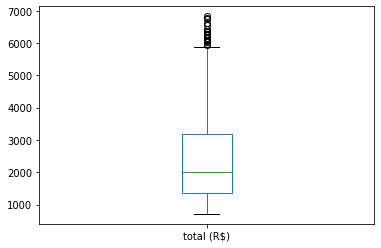

In [22]:
df_cps_total.plot(kind='box')

### São Paulo

In [23]:
df_sp = df.query("city == 'São Paulo'")
df_sp.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836
5,São Paulo,376,3,3,7,-,acept,not furnished,0,8000,834,121,8955
7,São Paulo,213,4,4,4,4,acept,not furnished,2254,3223,1735,41,7253


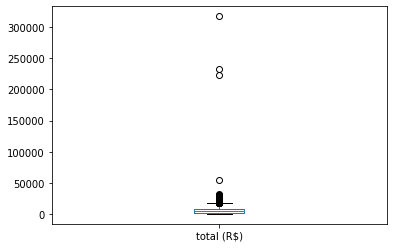

In [24]:
df_sp['total (R$)'].plot(kind='box')

Existem algumas observações de total que são no mínimo curiosas de tão distantes da média que elas se encontram.

### Outliers

Como no exemplo anterior e utilizando o mesmo método, analisaremos se esta estratégia é válida.

In [25]:
df_sp_total = df_sp['total (R$)']
df_sp_total.describe()

count      5887.000000
mean       6380.831833
std        7541.320897
min         508.000000
25%        2631.000000
50%        4596.000000
75%        8591.000000
max      316900.000000
Name: total (R$), dtype: float64

In [26]:
q1, q2, q3, = df_sp_total.quantile([.25,.5,.75])
iqr = q3 - q1
low_outlier = q1 - (1.5*iqr)
high_outlier = q3 + (1.5*iqr)
print(f"Low: {low_outlier}\nHigh: {high_outlier}")

Low: -6309.0
High: 17531.0


In [27]:
(df_sp_total > high_outlier).sum()

219

Das 5887 amostras originais, 219 são outliers superiores. Esta fração representa 3.72% dos dados, então é válido removermos esta parte do conjunto.

In [28]:
df_sp_total = df_sp_total[df_sp_total < high_outlier]

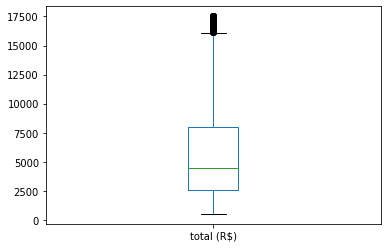

In [29]:
df_sp_total.plot(kind='box')

In [30]:
df_sp_total.describe()

count     5668.000000
mean      5700.357622
std       3989.786104
min        508.000000
25%       2572.250000
50%       4433.000000
75%       8001.250000
max      17520.000000
Name: total (R$), dtype: float64